In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity ="all"


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


# Measures of Central Tendencies
  
## Mean (Arithmetic Mean)
> Mean is the average of the group of numbers, in other words, mean is the sum of numbers in the group divided by the count of the total numbers in the group.

Mean $$ \mu= \frac{1}{N} \sum_{i=1}^N x_i = \frac{x_1+x_2+x_3+....x_i}{n}$$

Here, 
**$ \bar{X}$** = Mean 

**n**= Total numbers in the set.

**$x_i$** = data values

>To understand **Mean** in a much better let's take an example,

>Mr.Gupta is the principal of "ABC high school" and he wants to know whether students of class **5-A** are taller than students of class **5-B** and vice versa.
>
>So, he collects the heights of all the students in class 5-A, which are as follows:

 >*heights of 5-A (inches) *= 54, 53, 54.5, 56, 52, 55, 57, 51, 58, 52 

 >*heights of 5-B (inches)* = 52, 50, 56, 53, 54 ,51 ,53.8, 59, 55, 51

                     Mean of 5-A=
$$ \frac{54+ 53+ 54.5+ 56+ 52+ 55+ 57+ 51+ 58+ 52} {10} = 54.25 $$

                     Mean of 5-B= 
$$ \frac{52+ 50+ 56+ 53+ 54+ 51+ 53.8+ 59+ 55+ 51} {10} = 53.48 $$
 


In [4]:
#finding the mean of the column "Mthly_HH_Expense"
def User_Mean(X):
    sum=0
    for i in X:
        sum+=i
    mean=sum/len(X)
    return mean

In [5]:
User_Mean(df["Mthly_HH_Expense"])

18818.0

In [6]:
# cross checking using in_built mean function
df["Mthly_HH_Expense"].mean()

18818.0

## Median 

Median is the middle value of a set of sorted numbers.

- Median is one of the most easiest way to find the central value from a set of values.
- Median of a set of numbers is the value which separates the whole set in two equal halves, the values before median contains the lower half and values after 

**Step 1**:

**Sort all the values in ascending or descending order.**

**Step 2**:

**If the total number in the sets i.e.,  n is odd then use**

$$ Median = \frac{(n+1)}{2}^{th} observation $$

**If the total number of observations i.e., n is even then use**


$$ Median = \frac{\frac{n}{2}^{th} + \frac{(n+1)}{2}^{th} observation }{2}$$
         


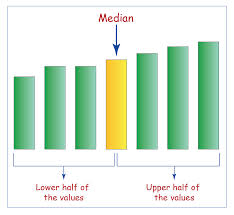          


##### Meadian of "Mthly_HH_Expense"

In [7]:
#step 1: sort the values
sort_value=sorted(df["Mthly_HH_Income"])
#step 2:
n=0
for i in sort_value:
    n+=1

#n =50 which is even so we use even method
if n % 2==0:
    a=sort_value[n//2] #n/2th term
    b=sort_value[n//2-1] #n
    median=(a+b)/2 
else:
    median=sort_value[n//2]

median


35000.0

In [8]:
df["Mthly_HH_Income"].median()

35000.0

## Mode
 > The most frequent values occuring in a set of elements.
 - There can no mode as well as there can be more than 1 mode for a set of observations.
 #### How to find mode

 - First arrange the values then count the occurence of each unique value in the set, find the element with most number of occurence in the set, that will be the mode for that particular set of values.
 
 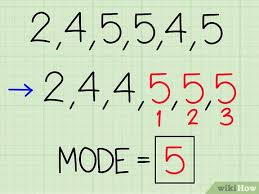
 
 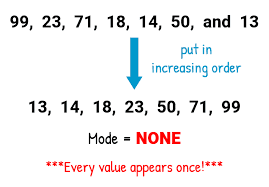

##### user_defined function for mode

In [9]:
def freq_values(x):
    n=0
    dic={}
    for i in sorted(x):
        dic.setdefault(i,0)
        dic[i]+=1
    
    for i,j in dic.items():
        if j==max(dic.values()):
            freq_val=i
    return freq_val

##### Mode of  "No_of_Fly_Members"

In [10]:
freq_values(df["No_of_Fly_Members"])

4

##### Mode of "Highest_Qualified_Member"

In [11]:
freq_values(df["Highest_Qualified_Member"])

'Graduate'

## Variance

>Variance of a set of values is the spread of values from their mean.

$$Var(X)=\frac{\sum{(x-\mu)}^2}{n}$$

Population Variance                 |   Sample Variance
-----------------------------       |    -------------------
$\sigma^2=\frac{\sum{(x-\mu)}^2}{n}$|   $S^2=\frac{\sum{(x-\bar{X})}^2}{n-1}$

why the n-1 in sample variance? 
- It is because of bessel's correction
https://en.wikipedia.org/wiki/Bessel%27s_correction

How to Calculate Variance
-----
- step 1: First Calculate the Mean.
- step 2: Subtract each observation with the mean, the resultant is called **deviation**.
- step 3: Square the deviation.
- step 4: Find the sum of all the squared deviations.
- step 5: take the value from step 4 and divide with the total no of observations.


### Features
- Variance gives us an idea about how dispered the observations are.
- The less the variance the better the Attribute.
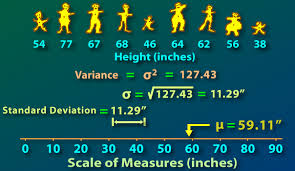

In [12]:
mean=sum(df["No_of_Fly_Members"])/len(df["No_of_Fly_Members"])
dev=[(i-mean)**2 for i in df["No_of_Fly_Members"]]
var= sum(dev)/(len(df["No_of_Fly_Members"])-1)
print(var)    

2.302448979591837


## Standard Deviation
Standard Deviation is the measure of deviation or spread of the data points in the datset from their mean.

$$SD=\sqrt\frac{\sum{(x-\mu)}^2}{n}$$

Population Variance                    |   Sample Variance
-----------------------------          |  -------------------
$\sigma=\sqrt\frac{\sum{(x-\mu)}^2}{n}$|   $S=\sqrt\frac{\sum{(x-\bar{X})}^2}{n-1}$




- It is calculated by simply doing the square root of variance.
- low standard deviation indicates the values are close to their mean.
- high standard deviation indicates the data points are wide spread across the mean.



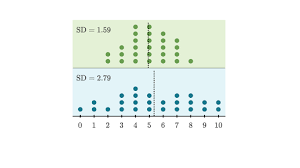

In [13]:
def std_user(X):
    mean=sum(X)/len(X)
    dev=[(i-mean)**2 for i in X]
    std= (sum(dev)/(len(X)-1))**0.5
    return std    

In [14]:
std_user(df["No_of_Fly_Members"])

1.5173822786601394

In [15]:
##to cross check
df["No_of_Fly_Members"].std()

1.5173822786601394

## Correlation

Correlation gives a measure of degree of relationship between two variables.

**Note**: Correlation does not indicate the causation of the one variable to another, it only measure the stregth of relation between them.

- There are mainly 2 types of correlation:

<font color="blue">1. Pearson's Correlation</font>

<font color="blue">2. Spearman Correlation</font>


#### 1. Pearson's Correlation Coefficient(r):

>The Pearson correlation coefficient, also known as r, R, or Pearson's r, is a measure of the strength and direction of the linear relationship between two variables that is defined as the covariance of the variables divided by the product of their standard deviations.$^{[1]}$

$$ r=\frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{ \sum (x_i - \bar{x})^2  \sum (y_i - \bar{y})^2}}$$


>r	=	correlation coefficient
>
>$x_{i}$	= values of the x-variable in a sample
>
>$\bar{x}$ = mean of the values of the x-variable
>
>$y_{i}$	= values of the y-variable in a sample
>
>$\bar{y}$ =	mean of the values of the y-variable

 
- The r can range between -1 to +1
- if r<0 it indicates there is a negative linear relation between the 2 variables .
- if r>0 it indicates there is a positive linear relation between the 2 variables.
- if r is nearer to $^+_-1$, it means there is strong relation between the 2 variables either positive or negative.
- if r is farther away or close to 0, it indicates there is a weaker or close to no significant relationship between the variables.

 
$\color{green}{\text{Properties}}$

- it is a parametric test
- it measures only linear relationship.
- mostly used for numerical variables.
 


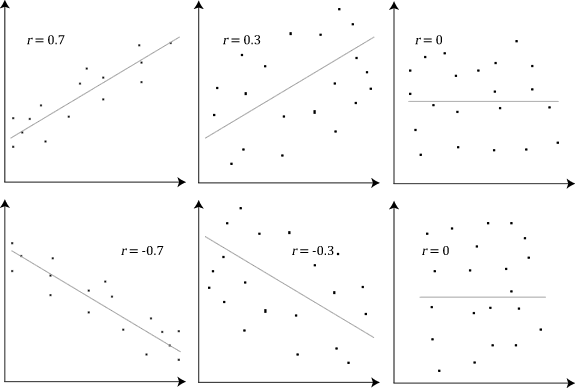

<font color="green">Assumptions</font>

- **Level of measurement**: refers to each variable should be continuous.
 
- **Related pairs**: refers to the pairs of variables, each observation should have a pair of values. So if the correlation was between weight and height, then each observation used should have both a weight and a height value.
 
- **No outliers**: both the variables should be outlier free.
 
- **Linearity**: a “straight line” relationship between the variable should be formed.

- **Homoscedasticity**: shape of the scatterplot should be tube-like in shape. If the shape is cone-like, then homoskedasticity would not be met.






















References:
[1] "List of Probability and Statistics Symbols". Math Vault. 2020-04-26. Retrieved 2020-08-22.

#### 2. Spearson's Correlation Coefficient(r):

Spearson Correlation is measure of strength and monotonic relation between two variables.

$$ \rho = 1- \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

>$\rho$ = Spearman's rank correlation coefficient
>
>$d_{i}$	= difference between the two ranks of each observation.
>
>n =	number of observations

If there are ties in ranks within the dataset use the formula:

$$ \rho=\frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{\sqrt{ \sum (x_i - \bar{x})^2  \sum (y_i - \bar{y})^2}}$$

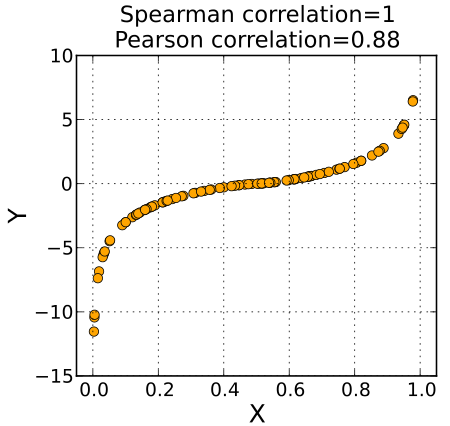



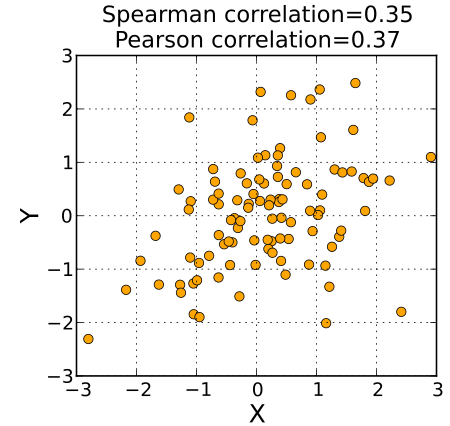


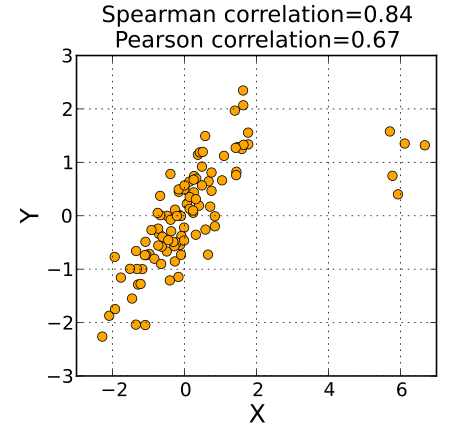

### Calculating the correlation between "Monthly_HH_Income" and "Monthly_HH_Expense"

- firstly lets check if there is any linear relationship between the two columns by plotting scatterplot

In [16]:
df.columns

Index(['Mthly_HH_Income', 'Mthly_HH_Expense', 'No_of_Fly_Members',
       'Emi_or_Rent_Amt', 'Annual_HH_Income', 'Highest_Qualified_Member',
       'No_of_Earning_Members'],
      dtype='object')

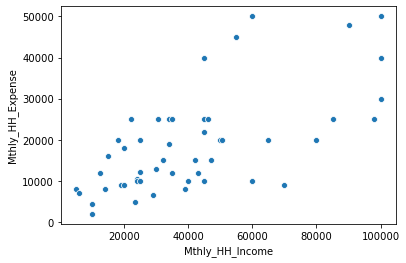

In [17]:
sns.scatterplot(x=df["Mthly_HH_Income"],y=df["Mthly_HH_Expense"])

- there is very slight positive linear relationship between the two variables in the first half, to know for sure let's calculate the correlation between the two.


#### Finding Covariance of X,Y

In [18]:
#for X i.e., df["Mthly_HH_Income"]
def cov_X_Y(X,Y):
    Mean_x=sum(X)/len(X)
    x_xbar=[x-Mean_x for x in X]
    #for Y i.e., df["Mthly_HH_Expense"]

    Mean_y=sum(Y)/len(Y)
    y_ybar=[y-Mean_y for y in Y]

    a=[x*y for x,y in zip(x_xbar,y_ybar)]
    Cov_X_Y=(sum(a))/(len(y_ybar)-1)
    return Cov_X_Y

 

In [19]:
cov_X_Y(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

204846485.7142857

In [20]:
cov_X_Y(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

204846485.7142857

In [21]:
#to cross check 
df.cov()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,6.811009e+08,2.048465e+08,17753.591837,6.022980e+06,8.106864e+09,6666.653061
Mthly_HH_Expense,2.048465e+08,1.461733e+08,11735.632653,3.058257e+07,2.288330e+09,2769.102041
No_of_Fly_Members,1.775359e+04,1.173563e+04,2.302449,8.126531e+02,2.093019e+05,0.665714
Emi_or_Rent_Amt,6.022980e+06,3.058257e+07,812.653061,3.895551e+07,5.426263e+06,-446.530612
Annual_HH_Income,8.106864e+09,2.288330e+09,209301.854694,5.426263e+06,1.024869e+11,69741.266939
No_of_Earning_Members,6.666653e+03,2.769102e+03,0.665714,-4.465306e+02,6.974127e+04,0.539184


In [22]:
def corr_user(X,Y):
    covXY=cov_X_Y(X,Y)
    std_X=std_user(X)
    std_Y=std_user(Y)
    corX_Y=covXY/(std_X*std_Y)
    return corX_Y

In [23]:
corr_user(df["Mthly_HH_Income"],df["Mthly_HH_Expense"])

0.6492152549316461

In [24]:
df.corr()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


# Normal Distribution

Normal distribution is also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve.


### Features of Normal Distribution
             
   ***In normal distributation The mean, mode and median are all equal.***
   
-  The curve is symmetric at the center (i.e. around the mean, μ).
-  Exactly half of the values are to the left of center and exactly half the values are to the right.
-  The total area under the curve is 1.
-  The skewness for Normal distribution is 0.
-  The kurtosis for Normal distribution is 3.


 **Empirical rule for the normal distribution**
 
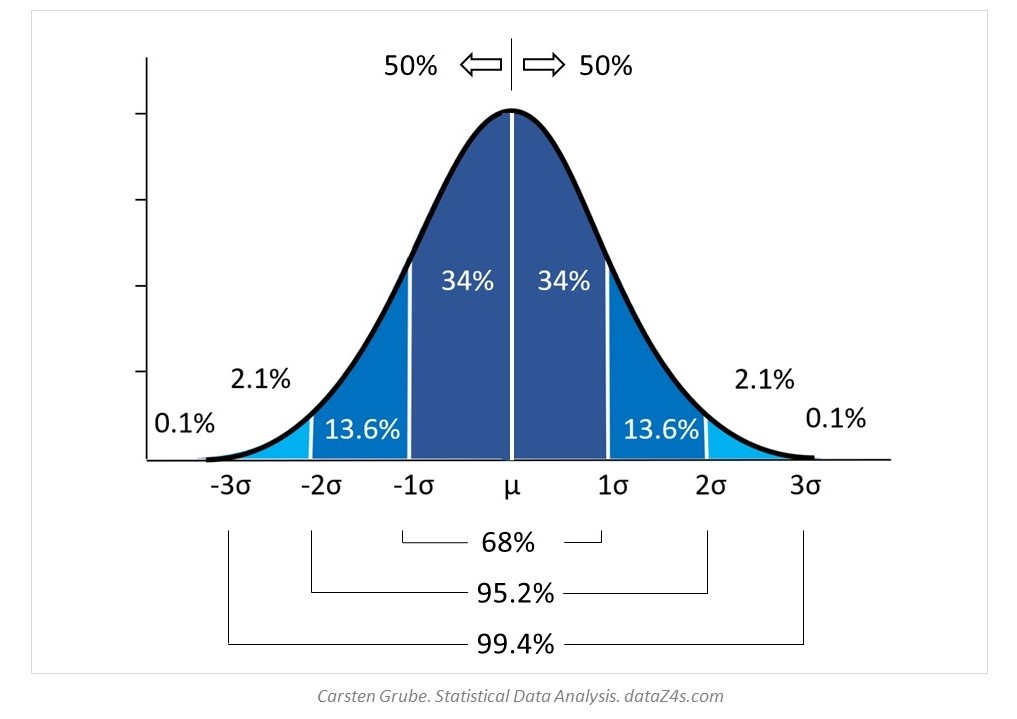
   *from the above diagram  
 
- 68% of data lies in the one standard deviation away from the mean.
- 95% of data lies in the two standard deviation away from the mean.
- 99.7% of data lies in the three standard deviation away from the mean.

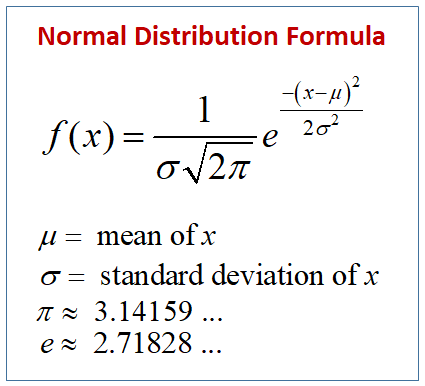



# Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a random variable. The skewness value can be **Positive**, **zero**, **Negative**.




**Formula:**
This is the alternative Pearson Mode Skewness.

$$Skew = \frac {3 * (Mean – Median)}{Standard Deviation}$$

**Original formula**
$$\frac {\sum_{i}^N (X_i-\bar{X})^3}{(N-1)*\sigma^3}$$
     
 
- $X_i$ is each individual score;
- $\bar{X}$ is the population mean;
- σ is the population standard deviation and
- N is the population size.

### Positive Skewness: ###
- when the skew value is positive , it means the variable is positively skewed or right skewed.
- Positive Skewness means when the tail on the right side of the distribution is longer.
- The mean > median >mode.
- It usually occurs when there are outliers on the upper end or right side meaning the random variable has large  extreme values.
           
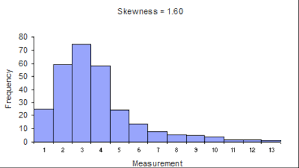



### Negative Skewness:###
            - Negative Skewness is when the tail of the left side of the distribution is longer.
            - The mean and median will be less than the mode.

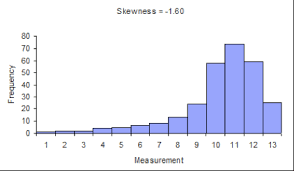

### Skewness = "Zero":###
                   
            - The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
 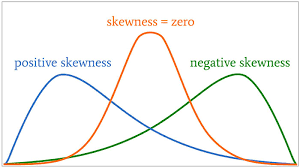

### Effect on Mean, Median and Mode due to Skewness


- when the distribution is positively skewed, the mean > median >mode.
- when the distribution is negatively skewed, the mean < median < mode.
- when the skewness is 0, it means it is a normal distribution and hence, mean = median = mode.